In [11]:
#A1: Linear Regression with One Attribute
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# Load the dataset
data = pd.read_csv("C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv")  # Update path as needed
 
# Split the data into features and target
X = data[['0']]  
y = data['LABEL']  
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)
 
# Predict on training data
y_train_pred = reg.predict(X_train)
 
# Predict on testing data
y_test_pred = reg.predict(X_test)
print('Linear regression model trained successfully. Predictions made on training and test data.')

Linear regression model trained successfully. Predictions made on training and test data.


In [12]:
# A2: Calculate MSE, RMSE, MAPE, and R2 Scores
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
 
# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
 
# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
 
# Print results
print(f"Training MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print(f"Testing MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")

Training MSE: 879.7902956038836, RMSE: 29.661259170909847, MAPE: 0.005715337994276426, R2: 1.2300346670102158e-06
Testing MSE: 841.3115172009182, RMSE: 29.00537048894425, MAPE: 0.0057473683991487706, R2: -0.0016475623755989321


In [13]:
# A3: Linear Regression with Multiple Attributes
# Using all attributes for training
X = data.drop(columns=['LABEL'])  # Remove the target column from features
 
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Train the model
reg = LinearRegression().fit(X_train, y_train)
 
# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Linear regression model trained on multiple attributes. Predictions made on training and test data.')

Linear regression model trained on multiple attributes. Predictions made on training and test data.


In [15]:
#A4: K-Means Clustering
from sklearn.cluster import KMeans
import pandas as pd
 
# Load your dataset (update the file path and column names accordingly)
data = pd.read_csv("C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv")  # Replace with the correct path if necessary
 
# Remove the target variable ('LABEL' in your case) for clustering
X = data.drop(columns=['LABEL'])  # Ensure 'LABEL' is the correct name of the target column
 
# K-means clustering with corrected n_init value
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)  # n_init should be an integer
 
# Cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_
 
# Print the results
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)
 

Cluster Labels: [1 0 0 ... 1 1 1]
Cluster Centers: [[ 2.86160054e+04  3.15096743e+01  1.88905449e+01  1.20722320e+03
   8.95772884e+00  1.21462791e+03 -7.65600173e+01 -1.73679527e+01
  -3.18437467e+01 -4.53580736e+01 -7.31546026e+02 -1.49042680e+01
  -1.51726820e+03 -1.66024599e+01 -7.49601087e+02  7.90370820e+01
  -5.54413162e+00  7.41559852e+01  3.90339425e+01  1.16344388e+00
   4.45404410e+01  1.64505835e+02  1.64026777e+01  8.17703027e+02
   3.78203216e+01  8.35567938e+02  1.43936158e+01  1.82421897e+02
  -4.69499737e+01  2.72377824e+01 -7.22780939e+01  1.83298184e+01
   1.91029130e+00 -3.42729338e+01  2.51170810e+01 -2.26718452e+01
   1.04116296e+02 -2.34007401e+00 -2.00719501e+02 -3.00842558e+01
  -4.38734096e+02 -3.28918746e+01 -2.15918511e+02 -6.75920803e+00
   1.07325518e+02  7.91504470e+00 -3.63548708e+01  3.49547020e+01
  -7.20937601e+01 -1.64200242e+01 -3.26275504e+01 -6.81223497e+01
   8.93886156e+00 -3.37280007e+01 -3.10968899e+00 -1.77657851e+02
  -2.49170479e+00 -1.9200

In [16]:
#A5: Calculate Silhouette, Calinski-Harabasz, and Davies-Bouldin Scores
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
 
# Calculating clustering metrics
silhouette = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_index = davies_bouldin_score(X, labels)
 
print(f"Silhouette Score: {silhouette}, CH Score: {ch_score}, DB Index: {db_index}")

Silhouette Score: 0.3090456889374573, CH Score: 1169.0812057024555, DB Index: 1.2024154400250284


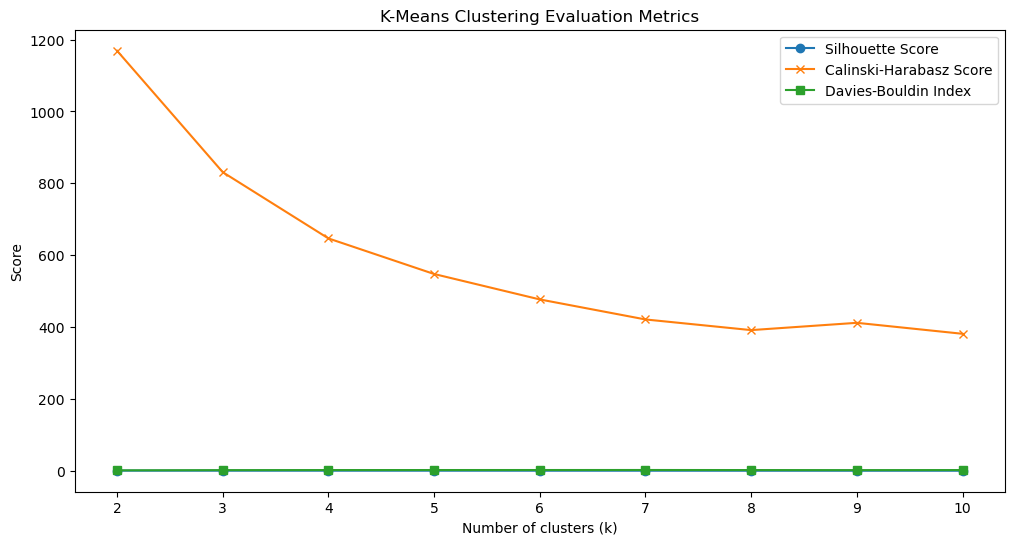

In [17]:
#A6: K-Means Clustering for Different Values of k
import matplotlib.pyplot as plt
 
sil_scores = []
ch_scores = []
db_indexes = []
 
# Evaluate scores for k = 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_indexes.append(davies_bouldin_score(X, labels))
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sil_scores, marker='o', label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, marker='x', label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_indexes, marker='s', label='Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.title('K-Means Clustering Evaluation Metrics')
plt.legend()
plt.show()

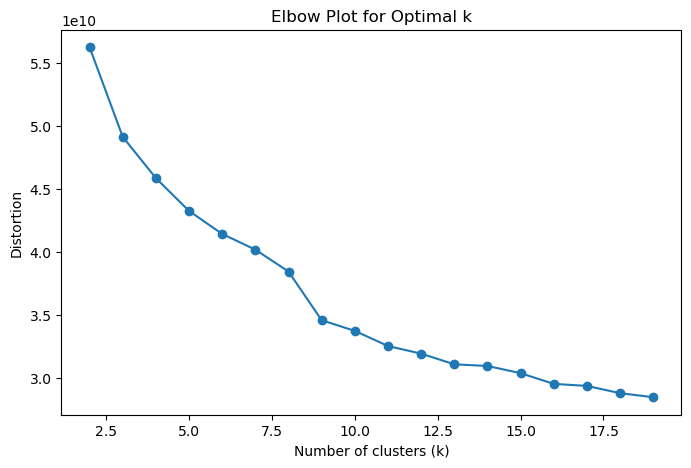

In [18]:
#A7: Elbow Plot to Determine Optimal k
distortions = []
 
# Elbow method
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(kmeans.inertia_)
 
# Plotting elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Plot for Optimal k')
plt.show()